<p style='text-align: center; color:#4682B4; font-size: 38px'>Modelo de pronóstico de cancelación de clientes de la empresa de Telecomunicaciones Interconnect</a>

## Descripción General

El objetivo de este proyecto es desarrollar un modelo de *Machine Learning* para predecir qué clientes de **Interconnect** tienen más probabilidades de abandonar la empresa. Para lograrlo, realizaremos varios pasos y análisis, asegurando la calidad y consistencia de los datos, así como la correcta evaluación del modelo.

## Fases del Proyecto

1. **Calidad de Datos**  
   - Verificar la presencia de datos ausentes y duplicados.  
   - Asegurar que no existan inconsistencias en los valores.  
   - Validar tipos de datos y formatos adecuados.

2. **Análisis de Tendencias**  
   - Explorar la distribución de variables.  
   - Identificar correlaciones e insights relevantes que nos ayuden a entender el comportamiento de los clientes.

3. **Normalización de Datos**  
   - Comprobar si los datos requieren transformaciones (por ejemplo, escalado o estandarización).  
   - Asegurar que el modelo no se vea afectado por escalas distintas en las variables numéricas.

4. **Manejo de Datos Ausentes o Duplicados**  
   - Definir la estrategia para tratar valores nulos: eliminación o imputación.  
   - Determinar qué hacer con los registros duplicados para evitar sesgos.

5. **Construcción y Evaluación del Modelo**  
   - Entrenar el modelo y realizar validaciones cruzadas para comprobar la robustez del mismo.  
   - Evaluar el desempeño con métricas como **Accuracy**, **Precision**, **Recall** y **F1-score**.  
   - Realizar una “prueba de cordura” (sanity check) para verificar que el modelo no está sobreajustado (overfitting).

6. **Conclusiones y Estrategia de Retención**  
   - Identificar los factores clave que influyen en el abandono de los clientes.  
   - Proponer acciones de retención basadas en los resultados y conclusiones del análisis.  
   - Orientar al equipo de Marketing para diseñar una campaña de retención efectiva.

## Resultados Esperados

- Un modelo predictivo capaz de identificar a los clientes con mayor riesgo de abandono.  
- Informe de métricas y análisis detallado que muestre la eficacia y fiabilidad del modelo.  
- Recomendaciones accionables para el equipo de Marketing con base en los hallazgos encontrados.

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Carga de los Datos](#data_charge)
    * [1.1 Importar librerías y conjuntos de datos](#data_type)
    * [1.2 Unión de los 4 conjuntos en uno solo](#data_join)
    * [1.3 Identificar valores nulos y duplicados](#data_nan)
    * [1.4 Tipos de datos del conjunto](#data_type)
    * [1.5 Normalización de escritura de características y observaciones](#data_lower)
* [Etapa 2. Análisis exploratorio de datos (EDA)](#data_exploration)
    * [2.1 Análisis Univariado](#data_analysis_univariado)
    * [2.2 Análisis Bivariado](#data_bivariado)
    * [2.3 Análisis Multivariado](#data_multivariado)
    * [2.4 Visualización de valores nulos](#data_nan)
    * [2.5 Análisis de la variable objetivo (churn)](#data_churn)
* [Etapa 3. Manejo de datos Nulos](#data_nan)
    * [3.1 Reemplazo de valores Nulos](#data_replace)
* [Etapa 4. Escalado de variables numéricas y codificación de variables categóricas](#datas_category)
    * [4.1 Escalado de variables categóricas](#data_escalade)
    * [4.2 Codificación de variables categórica](#data_code)
* [Etapa 5. Construcción y evaluación del Modelo](#data_model)
    * [5.1 Dividir datos en conjunto de entrenamiento, prueba y validación](#data_split)
    * [5.2 Modelo RandomForestClassifier](#data_random)
    * [5.3 Manejo del desbalance de la clase minoritaria mediante sobremuestreo mediante SMOTE](#smote)
    * [5.4 Manejo de desbalance de la clase mayoritaria, reduciéndola a la clasa minoritaria mediante undersampling](#unsersampling)
    * [5.5 Manejo de desbalance de las clases, con combinación de SMOTE y undersampling juntas](#smoteen)
    * [5.6 Modelo XGBoost con un ratio para dar mas peso a la clase minoritaria](#XGBoost)
    * [5.7 Validación cruzada para encontrar la mejor combinación de hiperparámetros](#validation)
    * [5.8 Prueba de cordura](#cordura)
* [Conclusiones finales del proyecto](#end)

## Introducción <a id='intro'></a>

El objetivo de este proyecto es crear un **modelo predictivo** para **Interconnect**, un operador de telecomunicaciones, con el fin de pronosticar la **tasa de cancelación de clientes**. Mediante el análisis de datos relacionados con los servicios contratados (telefonía fija, Internet, entre otros) y las características personales de los clientes, se busca identificar a aquellos con mayor riesgo de cancelar sus servicios. Esto permitirá al equipo de marketing implementar acciones proactivas, como ofrecer promociones o planes especiales, para retener a los usuarios.

## Etapa 1. Carga de los Datos <a id='data_charge'></a>

### 1.1 Importar librerías y conjuntos de datos <a id='data_type'></a>

In [33]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import seaborn as sns
import imblearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
import pickle
import os

# Imprimir las versiones de las librerías
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("sklearn:", sklearn.__version__)
print("imblearn:", imblearn.__version__)

pandas: 2.2.2
numpy: 1.26.4
matplotlib: 3.8.4
seaborn: 0.13.2
sklearn: 1.4.2
imblearn: 0.12.3


In [34]:
# Importamos los datos a utilizar
df_contract = pd.read_csv(r'C:\Users\Albert\Desktop\final_provider\contract.csv', encoding='utf-8', encoding_errors='ignore')
df_internet = pd.read_csv(r'C:\Users\Albert\Desktop\final_provider\internet.csv', encoding='utf-8', encoding_errors='ignore')
df_personal = pd.read_csv(r'C:\Users\Albert\Desktop\final_provider\personal.csv', encoding='utf-8', encoding_errors='ignore')
df_phone = pd.read_csv(r'C:\Users\Albert\Desktop\final_provider\phone.csv', encoding='utf-8', encoding_errors='ignore')

In [35]:
# Diccionario del conjunto de datos
conjuntos_de_datos = {'df_contract': df_contract, 'df_internet': df_internet, 'df_personal':df_personal, 'df_phone':df_phone}

# Llamar al método info para evaluar mas sobre estos 4 conjuntos de datos
for name, df in conjuntos_de_datos.items():
    print(f'Conjunto de datos: {name}')
    print(df.info())
    print(f'Llamando al siguiente conjunto de datos......')
    print('\n')

Conjunto de datos: df_contract
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
Llamando al siguiente conjunto de datos......


Conjunto de datos: df_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   Intern

Después de observar los 4 conjuntos de datos, observamos particularidades interesantes. El primer conjunto es sobre el contrato general de los clientes, el segundo es sobre el contrato de internet, el tercero sobre datos personales de los clientes y el cuarto habla sobre si el cliente tiene multiples lineas telefónicas. Algo muy relevante que encontramos es que ambos conjuntos tienen un identificador único que es customerID, por cuestión de facilidad de lectura de los datos vamos a utilizar un merge para unirlo en un solo conjunto, después poder hacer análisis más precisos.

### 1.2 Unión de los 4 conjuntos en uno solo <a id='data_join'></a>

In [36]:
# Utilización de merge para la unión de los conjuntos de datos
df = df_contract.merge(df_internet, on='customerID', how='left')
df = df.merge(df_personal, on='customerID', how='left')
df = df.merge(df_phone, on='customerID', how='left')

# Imprimir el nuevo conjunto de datos
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [37]:
# Imprimir un info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


Una ves realizado el merge ahora tenemos un solo conjunto de datos, nos será mas fácil estudiar la información de los datos, ahora pasemos a la siguiente etapa.


### 1.3 Identificar valores nulos y duplicados <a id='data_nan'></a>

In [38]:
# Valores duplicados
df['customerID'].duplicated().sum()

0

No se encontraron valores duplicados, después de esta información podemos estar seguros de que la consistencia de nuestros datos es correcta.

### 1.4 Tipos de datos del conjunto <a id='data_type'></a>

Llegado a esta parte, debemos entender bien los datos, ya que de aquí empieza a tomar forma el proyecto para que el modelo reciba los datos correctos y se pueda entrenar de una forma que nos de resultados tangibles altos, por este motivo, vamos a considerar la columna `enddate` como target, debido a que en esta característica tenemos usuarios que ya se dieron de baja y usuarios que continúan en la empresa se utilizará junto con beginddate para conocer cuánto tiempo llevan en la compañía. Primero se convertirá a formato fecha estas dos características para después extraer los días que los clientes llevan en la empresa.

In [39]:
# Convertir columnas a formato de fecha
df['BeginDate'] = pd.to_datetime(df['BeginDate'], errors='coerce')
df['EndDate_temp'] = pd.to_datetime(df['EndDate'], errors='coerce')

# Crear variable churn para saber si abandonó la empresa o no con where
df['churn'] = np.where(df['EndDate'] == 'No', 0, 1)

C:\Users\Albert\AppData\Local\Temp\ipykernel_25760\480931004.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EndDate_temp'] = pd.to_datetime(df['EndDate'], errors='coerce')


In [40]:
# Obtener la fecha máxima de la característica `EndDate` para poder hacer la operación de cuántos días lleva en la empresa cada cliente
df['EndDate_temp'].max()

Timestamp('2020-01-01 00:00:00')

In [41]:
# Crear la fecha corte
fecha_corte = pd.to_datetime('2020-01-01')

In [42]:
# Crear la fecha final con la característica `EndDate_temp`
df['enf_final'] = df['EndDate_temp'].fillna(fecha_corte)

In [43]:
# Restar a la fecha de inicio la fecha fin
df['total_days'] = (df['enf_final'] - df['BeginDate']).dt.days
df['total_months'] = df['total_days'] / 30.0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

Después de hacer estas operaciones, tenemos una variable que nos dice el total de meses que cada cliente pertenece o ha pertenecido a la empresa, una información muy útil para el modelo de ML, ahora pasamos a verificar los tipos de datos.

In [45]:
# Corrección de tipos de datos del df
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Después de verificar el correcto uso de los tipos de datos nuestros datos se encuentran con la información necesaria para pasar adelante.

### 1.5 Normalización de escritura de características y observaciones <a id='data_lower'></a>

In [46]:
# Normalización a lower de las características
df.columns = df.columns.str.lower()

# Normalización de las observaciones
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\Albert\AppData\Local\Temp\ipykernel_25760\976733351.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


Hasta esta parte hemos terminado la etapa 1: Carga de los datos. A grandes rasgos lo que se ha hecho es unir todo en un solo df, agregar características al df, verificar sus tipos de datos y realizar una normalización de sus características y observaciones a un formato estandarizado de escritura, ahora veamos a detalle los datos de forma visual para entender mejor su composición.

## Etapa 2. Análisis exploratorio de datos (EDA) <a id='data_exploration'></a>

### 2.1 Análisis Univariado <a id='data_analysis_univariado'>

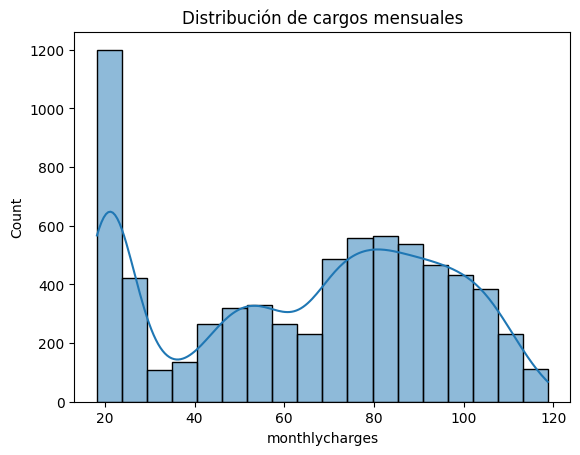

In [47]:
# Histograma de los cargos mensuales de los usuarios
sns.histplot(data=df, x='monthlycharges', kde=True)
plt.title('Distribución de cargos mensuales')
plt.show()

Podemos observar en este histograma como se comportan las facturas mensuales de los clientes, tenemos una gran cantidad de clientes que su consumo es bajo, y en su caso contrario tenemos pocos usuarios con un consumo alto, el histograma nos dice que una parte de usuarios menor consume el nivel bajo, porque la mayoría de los usuarios sus cuotas mensuales superan los 70 USD, sigamos adelante con mas observaciones.

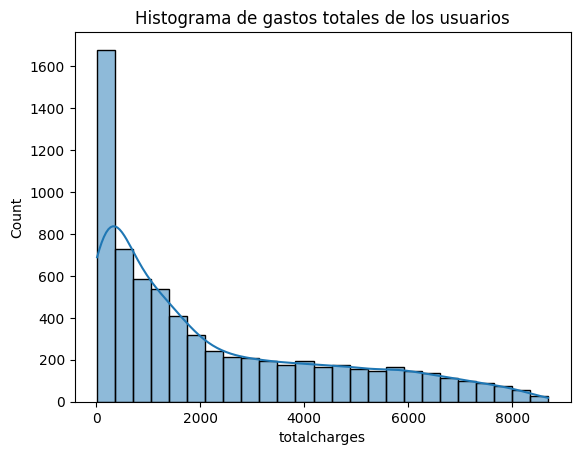

In [48]:
# Histograma de los gastos totales de los usuarios en la empresa
sns.histplot(data=df, x='totalcharges', kde=True)
plt.title('Histograma de gastos totales de los usuarios')
plt.show()

Podemos concluir que una ligera mayor parte de los usuarios se encuentran por debajo de los 2100 USD, mientras que después de ellos la curva prácticamente es igual, lo cual nos deja ver que son clientes con un consumo estándar mes con mes, también tenemos muy buenos clientes que superan los 6000 USD de consumo en toda la historia de la empresa. 

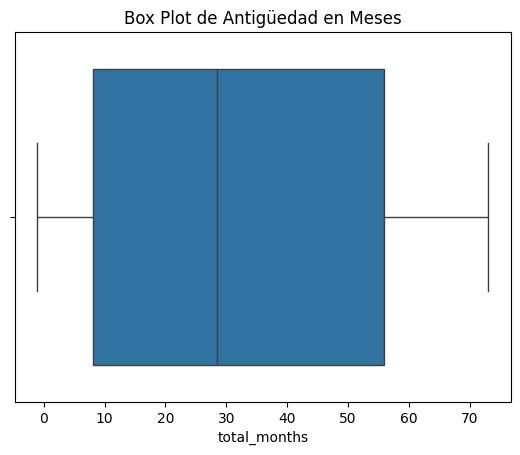

In [49]:
# Boxplot de Antigüedad en Meses
sns.boxplot(data=df, x='total_months')
plt.title('Box Plot de Antigüedad en Meses')
plt.show()


Después de observar este Box Plot concluimos lo siguiente. Hay valores muy bajos clientes que han durado muy pocos días o escasas semanas, el primer cuartil esta en 10 meses, es decir el 25% de los clientes se encuentran menos de 10 meses, la mediana se encuentra en 29 meses, lo que nos dice que el 50% de los clientes se encuentran con un tiempo menor a 29 meses y el otro 50% mayor a estos meses, el tercer cuartil nos deja ver que el 75% se encuentra por debajo de los 56 meses, y el otro 25% restante se encuentra después de los 56 meses, estos nos deja ver que son clientes muy fieles, que el modelo tendrá que tener muy en cuenta, incluso hay clientes con una fidelidad genial de hasta 70 meses, dichos clientes también merecerían unas buenas promociones.

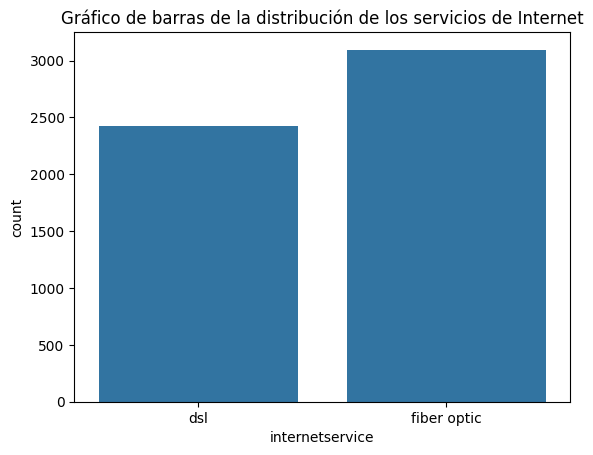

In [50]:
# Gráfico de barras de la distribución de servicios de internet
sns.countplot(data=df, x='internetservice')
plt.title('Gráfico de barras de la distribución de los servicios de Internet')
plt.show()

Este histograma nos muestra la distribución del servicio de Internet, a grado razonable aunque fiber optic tiene mas usuarios dsl no se queda atras, un importante numero cuenta con el servicio dsl, lo que nos refleja que aquí no tenemos desbalanceo de red.

### 2.2 Análisis Bivariado <a id='data_bivariado'></a>

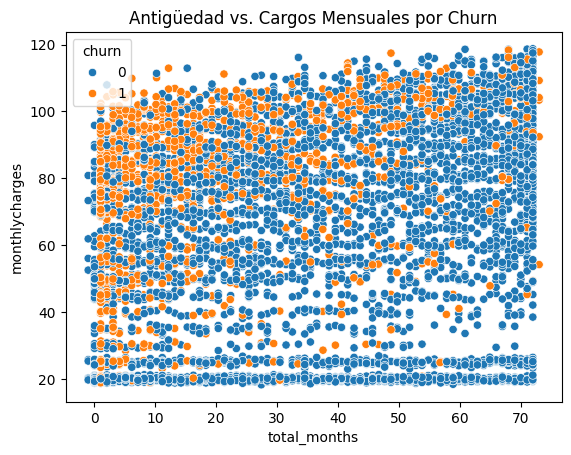

In [51]:
# Diagrama de dispersión de dos variables numéricas
sns.scatterplot(data=df, x='total_months', y='monthlycharges', hue='churn')
plt.title('Antigüedad vs. Cargos Mensuales por Churn')
plt.show()

Este diagrama de dispersión es muy importante en este estudio, primero no tenemos una fuerte relación lineal y segundo una de las hipótesis que se tenía se cumple, los usuarios con menores meses de servicio tienen mas probabilidades de abandonar la empresa, solo que por otro lado también tenemos algo relevante, porque hay usuarios nuevos con un alto consumo por mes pero que abandonaron la empresa rápidamente, también tenemos clientes, que tienen mucho tiempo en la empresa que deciden marcharse, esta información es útil a tener en cuenta.

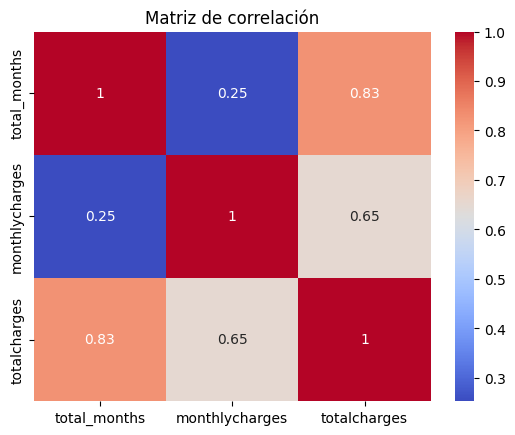

In [52]:
# Heatmap de correlación entre variables numéricas
corr = df[['total_months', 'monthlycharges', 'totalcharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

En este heat map encontramos las correlaciones entre tres variables numéricas, lo cual como era de suponer, vemos que ambas tienen una correlación positiva, por ejemplo el total de meses tiene una correlación relativa con lo que se paga por mes, pero esta misma variable total de meses tiene una correlación muy fuerte con el total pagado de cada usuario, de esta forma nuestros datos llevan el orden que se creía que tendrían.

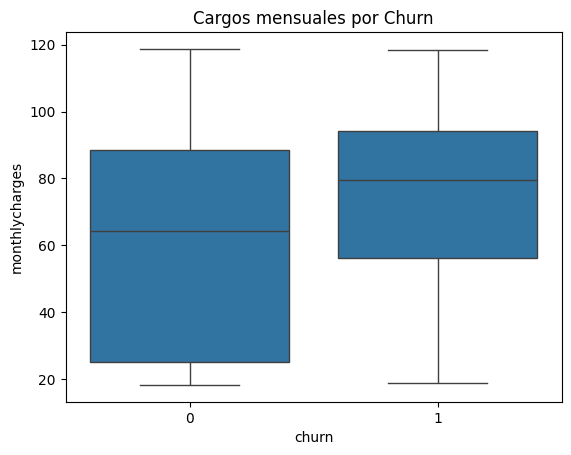

In [53]:
# Cargos mensuales por usuarios que permanecen o se van
sns.boxplot(data=df, x='churn', y='monthlycharges')
plt.title('Cargos mensuales por Churn')
plt.show()

Este BoxPlot nos dice algo interesante y es que los que mas gastan son los que se van de la empresa, la media de gasto de los que se fueron es de 82 USD mientras que los que se quedan es de 62 USD, además los usuarios que se van sus gastos mensuales comienzan en 58 USD, mientras que los que están en la empresa sus gastos empiezan en 28 USD.

### 2.3 Análisis Multivariado <a id='data_multivariado'></a>

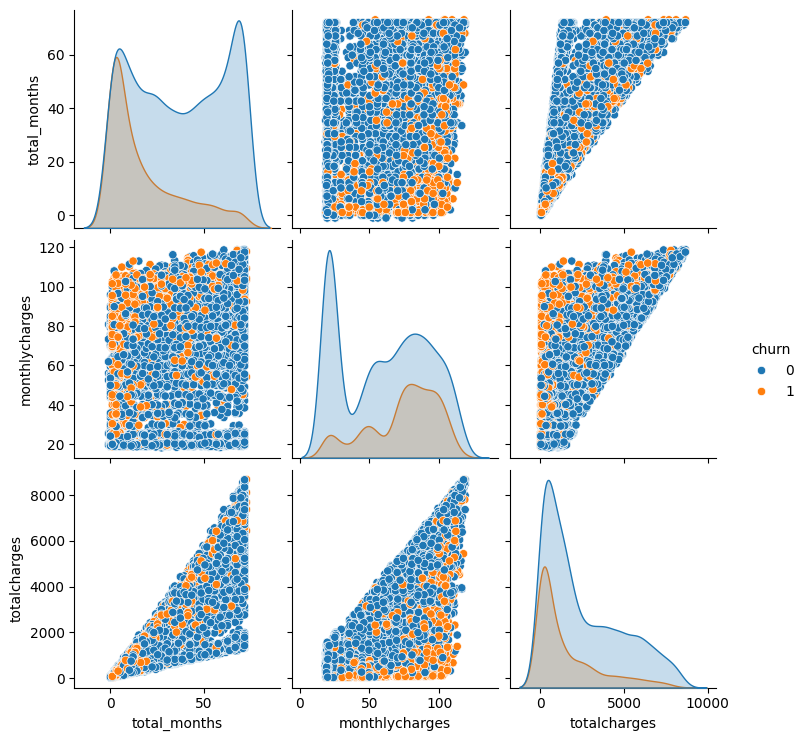

In [54]:
# Pairplot de la distribución de variables numéricas claves
sns.pairplot(df[['total_months', 'monthlycharges', 'totalcharges', 'churn']], hue='churn')
plt.show()

Este pairplot nos dice información muy importante, primero tenemos las distribuciones, por ejemplo en los meses totales con los cargos mensuales no vemos una correlación sino datos dispersos, que nos dice que quienes abandonan la empresa suelen tener pagos mensuales un tanto altos.

* En el total de meses con el total de cargos observamos una fuerte correlación, la cual es lógica ya que entre más meses estan en la empresa, mas dinero gastarás a lo largo del tiempo. 

* En el total de mes gastado de cada usuario tiene una fuerte correlación con el total gastado a lo largo del tiempo, lo cual es lógico, aquí vemos que los usuarios que permanecen en la empresa son los que tienen pagos históricos mas altos. 

* En cuanto a los gráficos diagonales, vemos las correlaciones de cada variable numérica con si misma, en los meses totales, la gran mayoría de usuarios que abandonaron la empresa solo estuvieron una cantidad corta de meses, mientras que los que siguen en ella, tienen una historia de varios meses con la empresa.

* En los cargos mensuales, observamos que los usuarios que abandonaron la empresa tenían facturas mensuales mas altas de los que continuaron contratando los servicios de la empresa.

* En el total de cargos visualizamos que los clientes que se fueron no tienen un total de cargos históricos altos sino mas bajos que los que aun continúan en la empresa. Incluso hay algunos usuarios que continúan que son muy buenos clientes.




### 2.4 Visualización de valores nulos <a id='data_nan'></a>

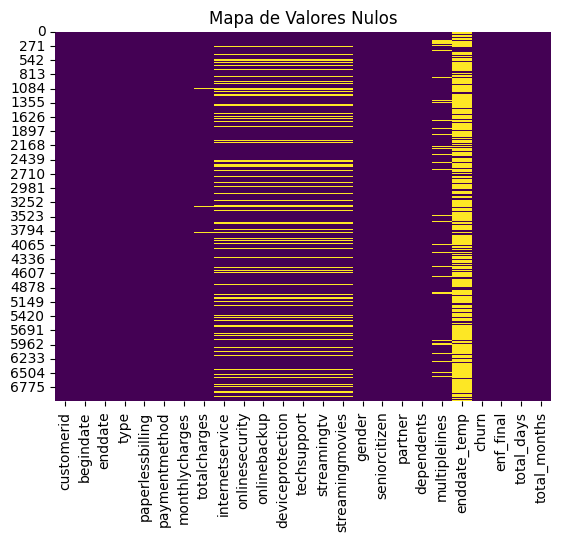

In [55]:
# Heatmap de valores nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Nulos')
plt.show()

Este heatmap de los valores nulos nos muestra en donde se cargan mas los valores ausentes, en las variables de internetservice hasta streamingmovies vemos que los valores ausentes están en el todo el df, a lo largo de todas las filas, en el caso de multiplelines vemos que se centra más en ciertos conjuntos, y en la variable endate_temp es solo una variable que se ocupo antes, asi que esta es irrelevante.

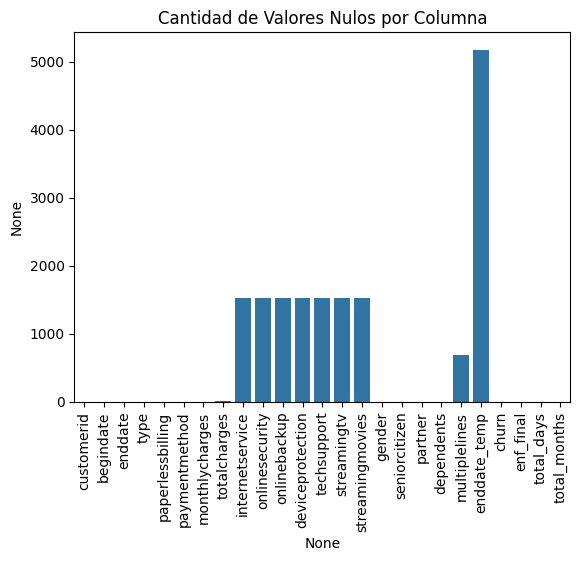

In [56]:
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.title('Cantidad de Valores Nulos por Columna')
plt.xticks(rotation=90)
plt.show()


Se puede concluir que los valores ausentes en la gran mayoría de las variables lleva una relación ya que la misma cantidad de datos nan son los que están presentes, esto lo tendremos en cuenta a la hora de atender los valores ausentes.

### 2.5 Análisis de la variable objetivo (churn) <a id='data_nan'></a>

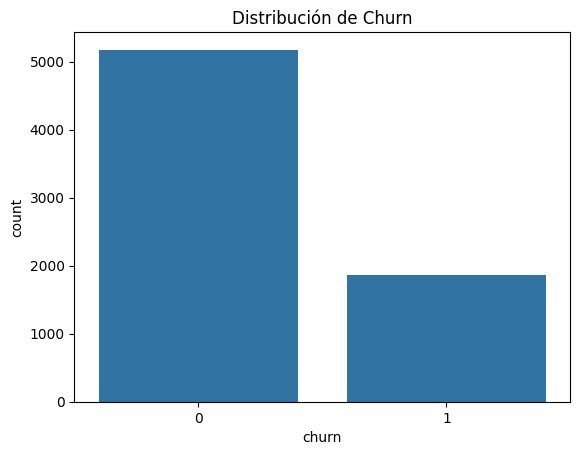

In [57]:
# Distribución de churn
sns.countplot(data=df, x='churn')
plt.title('Distribución de Churn')
plt.show()

Aquí nos encontramos con una situación importante a tomar en cuenta, ya que la clase esta desbalanceada, estos lo vamos a tener que corregir, sino el modelo se va a ajustar en favor de no abandonar, ya que no están parejas las clases, esto lo tendremos que abordar más adelante.

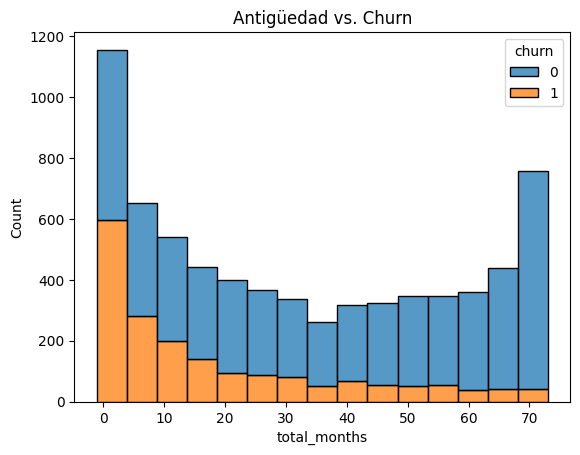

In [58]:
# Distribución de churn por Antigüedad
sns.histplot(data=df, x='total_months', hue='churn', multiple='stack')
plt.title('Antigüedad vs. Churn')
plt.show()

En esta distribución observamos la probabilidad de abandono de la empresa, vemos que en los primeros meses la mayoría de las personas se fueron, y conforme los meses avanzan la mayor cantidad de clientes se quedan contra los que se van.

## Etapa 3. Manejo de datos Nulos <a id='data_nan'></a>

### 3.1 Reemplazo de valores Nulos <a id='data_replace'></a>

In [59]:
# Verificación de valores Nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   internetservice   5517 non-null   object        
 9   onlinesecurity    5517 non-null   object        
 10  onlinebackup      5517 non-null   object        
 11  deviceprotection  5517 non-null   object        
 12  techsupport       5517 non-null   object        
 13  streamingtv       5517 non-null   object        
 14  streamingmovies   5517 n

In [60]:
# Reemplazar con moda las 9 filas de `totalcharges`
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].mode()[0])

Como se puede observar en este info y como se observó en el histograma y mapa de calor tenemos valores ausentes em algunas características, las cuales son `internetservice`, `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, `streamingmovies` y `multiplelines`. Del lado de las características numéricas teníamos 9 filas ausentes en `totalcharges` pero esto ya ha quedado resuelto.
Tenemos muchas formas como solventar estos valores ausentes, lo más fácil sería imputarlos con alguna medida de referencia por ejemplo la moda, más sin embargo esto no sería lo mejor, primero porque los valores faltantes son una cantidad importante sobre el total de los datos, de tal forma que se tiene que tener la certeza que los valores imputados serán los que más se acerquen a la realidad. 

Por tal forma, vamos a imputar los valores con un modelo de Clasificación, el modelo que mejor se adapta puede ser el RandomForestClassifier, mediante este modelo vamos a imputar nuestros valores ausentes. Antes de usar el modelo tenemos que verificar que características ocuparemos para ello, estas características serán dos, `monthlycharges`, `totalcharges` y `total_months`, no hay mejores variables que nos digan sobre los valores ausentes, ya que en el EDA observamos que a mayor consumo mayor pago mensual y total, por lo tanto, estas columnas serán las encargadas de predecir los valores ausentes. 
Debido a que se utilizará un modelo de RandomForestClassifier no será necesario escalar las variables numéricas, ya que es te modelo maneja bien la división de valores, por el contrario de si se usará una red neuronal, svm o regresión logística que si sería necesario escalarlas. Sin mas que decir, rellenemos nuestros valores nan.

In [61]:
# Lista de características a imputar
características_imputar = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines']

# Ciclo for para rellenar los valores ausentes
for columna in características_imputar:

    # Seleccionar los valores de la columna sin valores ausentes
    df_train = df.dropna(subset=[columna])

    # Seleccionar las características para entrenar el modelo
    features_train = df_train[['monthlycharges', 'totalcharges', 'total_months']]

    # Seleccionar el objetivo
    target_train = df_train[columna]

    # Crear el modelo
    model = RandomForestClassifier(n_estimators=500, random_state=42)

    # Entrenar el modelo
    model.fit(features_train, target_train)

    # Seleccionar los valores de la columna con los valores ausentes
    df_missing = df[df[columna].isnull()]

    # Seleccionar las características para predecir el modelo
    features_test = df_missing[['monthlycharges', 'totalcharges', 'total_months']]

    # Predicciones del modelo
    predicciones = model.predict(features_test)

    # Imputar la columna con las predicciones
    df.loc[df[columna].isnull(), columna] = predicciones

    # Mensaje de imputación correcta
    print(f'Columna {columna} imputada exitosamente')


Columna internetservice imputada exitosamente
Columna onlinesecurity imputada exitosamente
Columna onlinebackup imputada exitosamente
Columna deviceprotection imputada exitosamente
Columna techsupport imputada exitosamente
Columna streamingtv imputada exitosamente
Columna streamingmovies imputada exitosamente
Columna multiplelines imputada exitosamente


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   internetservice   7043 non-null   object        
 9   onlinesecurity    7043 non-null   object        
 10  onlinebackup      7043 non-null   object        
 11  deviceprotection  7043 non-null   object        
 12  techsupport       7043 non-null   object        
 13  streamingtv       7043 non-null   object        
 14  streamingmovies   7043 n

Después de ejecutar el modelo, nuestros datos faltantes han sido imputados, de tal forma nuestros datos imputados tienen un nivel de confianza alto.

## Etapa 4. Escalado de variables numéricas y codificación de variables categóricas <a id='datas_category'></a>

### 4.1 Escalado de variables numéricas <a id='data_escalade'></a>

Debido a que vamos a ocupar dos modelos que se comportan bien en problemas de clasificación que son RandomForestClassifier y XGBoost. Estos modelos no se necesitan escalar los datos como en otros modelos, ya que estos manejan la información de las características de manera eficiente sin tener que escalarlos.

### 4.2 Codificación de variables categóricas <a id='data_code'></a>

Para codificar las variables categóricas tenemos dos formas, 1. One-Hot-Encoding 2. LabelEncoder. Para poder aplicar la primera las características no deben tener ningún orden o relación y para ocupar la segunda es lo contrario debe tener un orden como por ejemplo, altura = bajo, medio, alto. Estos dos tipos de codificación son lo que tenemos que seguir para que el modelo pueda entender, comprender y predecir nuestra característica objetivo.

* `Características que se codificarán con One-Hot-Encoding`: `type`, `paymentmethod`, `internetservice`, `gender`.

* `Características que se codificarán con LabelEncoder` `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, `streamingmovies`, `partner`, `dependents`, `multiplelines`. 

In [63]:
# Crear el archivo de encodificadores para el modelo que se correrá en Streamlit

# Crear carpeta "app" si no existe
os.makedirs("app", exist_ok=True)

# Codificación de variables con LabelEncoder
columnas_label = ['paperlessbilling', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'partner', 'dependents', 'multiplelines']

# Codificación de variables categóricas con OneHotEncoder
columnas_onehot = ['type', 'paymentmethod', 'internetservice', 'gender']


# Crear preprocesadores para utilizarlos en Streamlit
preprocesadores = {
    'label_encoders': {},
    'onehot_encoder': None
}


# Aplicar LabelEncoder y guardar los encoders
for columna in columnas_label:
    if columna in df.columns:
        encoder = LabelEncoder()
        df[columna] = encoder.fit_transform(df[columna])
        preprocesadores['label_encoders'][columna] = encoder
    else:
        print(f"⚠️ Advertencia: La columna '{columna}' no está en el DataFrame y no se codificará.")


# Aplicar OneHotEncoder y transformar df
if all(col in df.columns for col in columnas_onehot):
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    df_onehot = onehot_encoder.fit_transform(df[columnas_onehot])

    # Convertir el array resultante en un DataFrame con nombres de columnas adecuados
    df_onehot = pd.DataFrame(df_onehot, columns=onehot_encoder.get_feature_names_out(columnas_onehot))

    # Eliminar del DataFrame original las columnas que fueron codificadas
    df = df.drop(columns=columnas_onehot).reset_index(drop=True)

    # Unir las nuevas columnas codificadas con el DataFrame original
    df = pd.concat([df, df_onehot], axis=1)

    preprocesadores['onehot_encoder'] = onehot_encoder

else:
    print(f"⚠️ Advertencia: Algunas columnas para OneHotEncoding no están en el DataFrame.")


# Guardar los codificadores en un archivo .pkl
with open("app/preprocesador.pkl", "wb") as file:
    pickle.dump(preprocesadores, file)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerid                             7043 non-null   object        
 1   begindate                              7043 non-null   datetime64[ns]
 2   enddate                                7043 non-null   object        
 3   paperlessbilling                       7043 non-null   int32         
 4   monthlycharges                         7043 non-null   float64       
 5   totalcharges                           7043 non-null   float64       
 6   onlinesecurity                         7043 non-null   int32         
 7   onlinebackup                           7043 non-null   int32         
 8   deviceprotection                       7043 non-null   int32         
 9   techsupport                            7043 non-null   int32   

In [87]:
print("\nPrimeras 20 filas del DataFrame:")
print(df.head(20).to_string())


Primeras 20 filas del DataFrame:
    customerid  begindate              enddate  paperlessbilling  monthlycharges  totalcharges  onlinesecurity  onlinebackup  deviceprotection  techsupport  streamingtv  streamingmovies  seniorcitizen  partner  dependents  multiplelines enddate_temp  churn  enf_final  total_days  total_months  type_one year  type_two year  paymentmethod_credit card (automatic)  paymentmethod_electronic check  paymentmethod_mailed check  internetservice_fiber optic  gender_male
0   7590-vhveg 2020-01-01                   no                 1           29.85         29.85               0             1                 0            0            0                0              0        1           0              1          NaT      0 2020-01-01           0      0.000000            0.0            0.0                                    0.0                             1.0                         0.0                          0.0          0.0
1   5575-gnvde 2017-04-01           

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerid                             7043 non-null   object        
 1   begindate                              7043 non-null   datetime64[ns]
 2   enddate                                7043 non-null   object        
 3   paperlessbilling                       7043 non-null   int32         
 4   monthlycharges                         7043 non-null   float64       
 5   totalcharges                           7043 non-null   float64       
 6   onlinesecurity                         7043 non-null   int32         
 7   onlinebackup                           7043 non-null   int32         
 8   deviceprotection                       7043 non-null   int32         
 9   techsupport                            7043 non-null   int32   

Después de codificar las variables hemos cumplido los requisitos para que el modelo pueda ser entrenado y posteriormente poder ser ajustado a la clase de sobremuestreo, ahora los datos se encuentra en excelentes condiciones para pasar a la fase del entrenamiento del modelo.

## Etapa 5. Construcción y evaluación del Modelo <a id='data_model'></a>

### 5.1 Dividir datos en conjunto de entrenamiento, prueba y validación <a id='data_split'></a>

In [66]:
# Seleccionar características y target para el modelo

x = df.drop(columns=['customerid', 'begindate', 'enddate', 'enddate_temp', 'churn', 'enf_final'])
y = df['churn']

# Dividir conjunto de entrenamiento y prueba (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Dividir conjunto de entrenamiento y validación (80-20)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Imprimir las formas de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {x_train.shape[0]} ejemplos")
print(f"Tamaño del conjunto de validación: {x_valid.shape[0]} ejemplos")
print(f"Tamaño del conjunto de prueba: {x_test.shape[0]} ejemplos")

Tamaño del conjunto de entrenamiento: 4507 ejemplos
Tamaño del conjunto de validación: 1127 ejemplos
Tamaño del conjunto de prueba: 1409 ejemplos


Una vez dividido estos datos en entrenamiento, validación y prueba pasamos a la siguiente para que será, entrenar los modelos de ML y obtener las predicciones. 

`El objetivo a obtener para poder decir que el modelo resultó exitoso será de 0.75 en f1-score para ambas clases, de esta forma se podrá concluir que el sistema esta listo para poder ser usado en la empresa`

### 5.2 Modelo RandomForestClassifier <a id='data_random'></a>

In [67]:

# Instanciar el modelo con el parámetro class_weight para atender el sobremuestreo de los datos

model_forest = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=10, class_weight='balanced', n_jobs=1)

# Entrenar el modelo con el conjunto de entrenamiento
model_forest.fit(x_train, y_train)

# Realizar predicciones con los conjuntos de entrenamiento, validación y prueba
y_train_predic = model_forest.predict(x_train)
y_valid_predic = model_forest.predict(x_valid)
y_test_predic = model_forest.predict(x_test)

# Evaluar el modelo utilizando las métricas F1-Score y Accuracy para el conjunto de entrenamiento y prueba
print("Evaluación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_predic))
print()


print("Evaluación en el conjunto de validación:")
print(classification_report(y_valid, y_valid_predic))
print()

print("Evaluación en el conjunto de prueba:")
print(classification_report(y_test, y_test_predic))
print()


Evaluación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3316
           1       0.73      0.93      0.82      1191

    accuracy                           0.89      4507
   macro avg       0.85      0.90      0.87      4507
weighted avg       0.91      0.89      0.90      4507


Evaluación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       822
           1       0.64      0.70      0.67       305

    accuracy                           0.81      1127
   macro avg       0.76      0.78      0.77      1127
weighted avg       0.82      0.81      0.82      1127


Evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1036
           1       0.63      0.76      0.69       373

    accuracy                           0.82      1409
   m

In [68]:
"""
Resultados de la prueba número 1 del modelo de RandomForestClassifier, con los siguientes parámetros: RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')

Evaluación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3316
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      4507
   macro avg       1.00      1.00      1.00      4507
weighted avg       1.00      1.00      1.00      4507


Evaluación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       822
           1       0.76      0.53      0.63       305

    accuracy                           0.83      1127
   macro avg       0.80      0.74      0.76      1127
weighted avg       0.82      0.83      0.82      1127


Evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      1036
           1       0.78      0.53      0.63       373

    accuracy                           0.84      1409
   macro avg       0.81      0.74      0.76      1409
weighted avg       0.83      0.84      0.83      1409
"""

"\nResultados de la prueba número 1 del modelo de RandomForestClassifier, con los siguientes parámetros: RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')\n\nEvaluación en el conjunto de entrenamiento:\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3316\n           1       1.00      1.00      1.00      1191\n\n    accuracy                           1.00      4507\n   macro avg       1.00      1.00      1.00      4507\nweighted avg       1.00      1.00      1.00      4507\n\n\nEvaluación en el conjunto de validación:\n              precision    recall  f1-score   support\n\n           0       0.84      0.94      0.89       822\n           1       0.76      0.53      0.63       305\n\n    accuracy                           0.83      1127\n   macro avg       0.80      0.74      0.76      1127\nweighted avg       0.82      0.83      0.82      1127\n\n\nEvaluación en el conjunto de prueba:\n        

In [69]:
"""
Resultados de la prueba número 2 del modelo de RandomForestClassifier, ahora agregamos un hiperparámetro, max_depth, con esto limitamos la profundidad de los árboles para evitar sobreajuste, 
RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=10, class_weight='balanced')

Evaluación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3316
           1       0.73      0.93      0.82      1191

    accuracy                           0.89      4507
   macro avg       0.85      0.90      0.87      4507
weighted avg       0.91      0.89      0.90      4507


Evaluación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       822
           1       0.64      0.70      0.67       305

    accuracy                           0.81      1127
   macro avg       0.76      0.78      0.77      1127
weighted avg       0.82      0.81      0.82      1127


Evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1036
           1       0.63      0.76      0.69       373

    accuracy                           0.82      1409
   macro avg       0.77      0.80      0.78      1409
weighted avg       0.83      0.82      0.82      1409
"""

"\nResultados de la prueba número 2 del modelo de RandomForestClassifier, ahora agregamos un hiperparámetro, max_depth, con esto limitamos la profundidad de los árboles para evitar sobreajuste, \nRandomForestClassifier(n_estimators=1000, random_state=42, max_depth=10, class_weight='balanced')\n\nEvaluación en el conjunto de entrenamiento:\n              precision    recall  f1-score   support\n\n           0       0.97      0.88      0.92      3316\n           1       0.73      0.93      0.82      1191\n\n    accuracy                           0.89      4507\n   macro avg       0.85      0.90      0.87      4507\nweighted avg       0.91      0.89      0.90      4507\n\n\nEvaluación en el conjunto de validación:\n              precision    recall  f1-score   support\n\n           0       0.88      0.86      0.87       822\n           1       0.64      0.70      0.67       305\n\n    accuracy                           0.81      1127\n   macro avg       0.76      0.78      0.77      1127\

Al momento de llegar a este punto se investigó que modelos pueden trabajar mejor con un desbalanceo de clases, RandomForestClassifier y XGBoost se concluyó que serían los más ideales, primero ambos tienen un hiperparámetro para manejar el desbalanceo y segundo, mediante ovsersample o undersample nosotros podemos manejar este desbalanceo. 

`Modelo 1`: Como se puede observar en esta parte se entrenó un RandomForestClassifier, el primero fue solo con 500 árboles de decisión, seguido del hiperparámetro para manejar el desbalanceo de datos, aunque los resultados no fueron para nada buenos, en especial vemos que el modelo se ajustó mucho al entrenamiento, ya que ahí todas las métricas nos dan un 1 perfecto, lo cual desde ahí nos dice que el modelo ya esta sobreajustado, y aunque en el conjunto de validación y prueba, precisión estaba en un rango ideal, porque el modelo estaba prediciendo de alguna forma bien los datos del entrenamiento, pero por el lado de recall el modelo estaba perdiendo muchos datos, esto nos decía que de la cantidad objetivo era muy mayor al total de predicciones que estaba haciendo el modelo, asi que se entrenó otro modelo para mejorar resultados.

`Modelo 2`: En este modelo los arboles de decisión se subieron a 1000, y se agrego nivel máximo de max_depth en 10, esto para evitar que el modelo se enfrascará mucho en los datos de la clase mayoritaria, los resultados mejoraron muy poco, pero ahora al momento de verificar detalles como el conjunto de entrenamiento ya no vemos un 1 perfecto, esto nos dice que el modelo empieza a no sobreajustar los datos, vemos que precisión baja pero recall sube, esto nos dice que el modelo empezó a detectar mas valores exitosos del conjunto de objetivo, pero aún muy lejos del objetivo que es obtener 0.75 en f1-score para decir que el modelo es utilizable.



### 5.3 Manejo del desbalance de la clase minoritaria con sobremuestreo(oversample) mediante SMOTE <a id='smote'></a>

In [70]:
# Realizar oversample con SMOTE

# Instancia a SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento 
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Crear el modelo
model_forest = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=10, class_weight='balanced', n_jobs=-1)

# Entrenar el modelo después de aplicar SMOTE
model_forest.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [71]:
# Obtenemos nuevamente los datos de las predicciones 

# Realizar predicciones con los conjuntos de entrenamiento, validación y prueba
y_train_predic = model_forest.predict(x_train)
y_valid_predic = model_forest.predict(x_valid)
y_test_predic = model_forest.predict(x_test)

# Evaluar el modelo utilizando las métricas F1-Score y Accuracy para el conjunto de entrenamiento y prueba
print("Evaluación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_predic))
print()


print("Evaluación en el conjunto de validación:")
print(classification_report(y_valid, y_valid_predic))
print()

print("Evaluación en el conjunto de prueba:")
print(classification_report(y_test, y_test_predic))
print()

Evaluación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3316
           1       0.75      0.81      0.78      1191

    accuracy                           0.88      4507
   macro avg       0.84      0.86      0.85      4507
weighted avg       0.88      0.88      0.88      4507


Evaluación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       822
           1       0.66      0.64      0.65       305

    accuracy                           0.81      1127
   macro avg       0.76      0.76      0.76      1127
weighted avg       0.81      0.81      0.81      1127


Evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1036
           1       0.64      0.70      0.67       373

    accuracy                           0.82      1409
   m

`Modelo 3`: Con los modelos anteriores se vió que no fue suficiente el hiperparámetro del modelo para evitar el sobreajuste, ahora, utilizaremos SMOTE para hacer una representación mayor de la clase minoritaria, así, ambas clases podrán estar parejas en datos de entrenamiento a la hora de entrenarse, los resultados que se observan, los resultados siguen mucho que dando a desear, pese que en el entrenamiento no vemos un sobreajuste alto como tal, lo más posible es que SMOTE no pudo generalizar ni representar bien las pruebas que hizo para compensar el desbalance, esto le impidió al modelo extraer bien la información para llegar a la mayor cantidad de predicciones.

### 5.4 Manejo de desbalance de la clase mayoritaria, reduciéndola a la clasa minoritaria mediante undersampling <a id='undersampling'></a>

In [72]:
# Instanciar Undersample
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# Aplicamos Undersampling al conjunto de entrenamiento
x_train_undersample, y_train_undersample = under_sampler.fit_resample(x_train, y_train)

# Crear el modelo
model_forest = RandomForestClassifier(n_estimators=45000, random_state=42, max_depth=10, class_weight='balanced', min_samples_split=10, min_samples_leaf=5, n_jobs=-1)

# Entrenar el modelo después de aplicar SMOTE
model_forest.fit(x_train_undersample, y_train_undersample)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=45000, n_jobs=-1, random_state=42)

In [73]:
# Obtenemos nuevamente los datos de las predicciones 

# Realizar predicciones con los conjuntos de entrenamiento, validación y prueba
y_train_predic = model_forest.predict(x_train)
y_valid_predic = model_forest.predict(x_valid)
y_test_predic = model_forest.predict(x_test)

# Evaluar el modelo utilizando las métricas F1-Score y Accuracy para el conjunto de entrenamiento y prueba
print("Evaluación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_predic))
print()


print("Evaluación en el conjunto de validación:")
print(classification_report(y_valid, y_valid_predic))
print()

print("Evaluación en el conjunto de prueba:")
print(classification_report(y_test, y_test_predic))
print()

Evaluación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      3316
           1       0.64      0.88      0.74      1191

    accuracy                           0.84      4507
   macro avg       0.80      0.85      0.81      4507
weighted avg       0.87      0.84      0.85      4507


Evaluación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.90      0.82      0.85       822
           1       0.60      0.74      0.67       305

    accuracy                           0.80      1127
   macro avg       0.75      0.78      0.76      1127
weighted avg       0.82      0.80      0.80      1127


Evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1036
           1       0.60      0.81      0.69       373

    accuracy                           0.80      1409
   m

`Modelo 4`: Al ver que SMOTE no fue suficiente, pasamos a lo siguiente cuando se encuentra una baja representación de datos y es, RandomUnderSampler que nos sirve para hacer la clase mayoritaria menor y compensar asi el peso con la clase minoritaria, el riesgo que se corre con esto es que se pueden perder muchos datos importantes para el modelo, lo cual puede llevar a no poder extraer por completo la característica de los datos, pero es relativo, porque por el otro lado SMOTE puede agregar información de más que afecte negativamente el modelo, por esta forma no hay como ver los resultados directamente para ver como se comporta cada una de estas funciones que manejan el desbalance de clases. Los resultados de este modelo vemos que son muy ligeramente mejor a los datos de SMOTE, el recall subió muy poco, lo cual vemos que se siguen perdiendo muchos datos importantes, incluso se hicieron varios ajustes en los hiperparámetros, pero no se tuvo éxito, incluso en el número de arboles se asignaron 45000 para ver que tanto podían llegar los arboles con sus capas,, porque los resultados de f1 score siguen muy bajos, veamos una última manera de lidiar con el sobremuestreo.

### 5.5 Manejo de desbalance de las clases, con combinación de SMOTE y undersampling juntas <a id='smoteen'>

In [74]:
# Instanciamos SMOTE + ENN (Edited Nearest Neighbors, que realiza undersampling después de SMOTE)
smote_enn = SMOTEENN(random_state=42)

# Aplicamos SMOTE + ENN
x_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(x_train, y_train)

# Crear el modelo
model_forest = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=10, class_weight='balanced', n_jobs=-1)

# Entrenar el modelo después de aplicar SMOTE
model_forest.fit(x_train_smoteenn, y_train_smoteenn)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [75]:
# Obtenemos nuevamente los datos de las predicciones 

# Realizar predicciones con los conjuntos de entrenamiento, validación y prueba
y_train_predic = model_forest.predict(x_train)
y_valid_predic = model_forest.predict(x_valid)
y_test_predic = model_forest.predict(x_test)

# Evaluar el modelo utilizando las métricas F1-Score y Accuracy para el conjunto de entrenamiento y prueba
print("Evaluación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_predic))
print()


print("Evaluación en el conjunto de validación:")
print(classification_report(y_valid, y_valid_predic))
print()

print("Evaluación en el conjunto de prueba:")
print(classification_report(y_test, y_test_predic))
print()

Evaluación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      3316
           1       0.64      0.79      0.71      1191

    accuracy                           0.83      4507
   macro avg       0.78      0.82      0.79      4507
weighted avg       0.85      0.83      0.83      4507


Evaluación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       822
           1       0.62      0.72      0.67       305

    accuracy                           0.81      1127
   macro avg       0.76      0.78      0.77      1127
weighted avg       0.82      0.81      0.81      1127


Evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1036
           1       0.64      0.77      0.70       373

    accuracy                           0.82      1409
   m

`Modelo 5`: Después de aplicar sobremuestreo y submuestreo vemos que el problema no ha podido ser resuelto, ahora vamos a combinar ambos para ver si esto resulta en mejores resultados, con SMOTEENN se combina ambas para manejar los datos de la clase minoritaria, después de entrenar el modelo los datos mejoraron muy poco en recall y f1-score, pero aún siguen estando muy lejos del objetivo, después de aplicar 3 formas de lidiar con el desbalanceo de las clases llegamos unilateralmente a la conclusión que el modelo no esta siendo capaz, 1. Predecir los datos eficazmente con el desbalanceo de datos, 2. Manejar de forma correcta los datos generados por SMOTE o RandomUnderSampler. Se concluye que la mejor opción es probar otro modelo para lograr resultados más óptimos. 

Después de usar RandomForestClassifier y no ver resultados claros, usaremos XGBoost, un modelo que se basa en RandomForest pero a diferencia que este modelo mejora en cada iteración sus resultados, además es mas eficiente en recursos informáticos, así que veremos que resultados nos ofrece.

### 5.6 Modelo XGBoost con un ratio para dar mas peso a la clase minoritaria <a id='XGBoost'></a>

In [76]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

# Instanciar el modelo XGBoost con el parámetro scale_pos_weight
model_xgboost = XGBClassifier(n_estimators=45000, max_depth=1, learning_rate=0.2, subsample=1.0, colsample_bytree=1.0, scale_pos_weight=1, n_jobs=-1)

# Entrenar el modelo
model_xgboost.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=45000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
# Obtenemos nuevamente los datos de las predicciones 

# Realizar predicciones con los conjuntos de entrenamiento, validación y prueba
y_train_predic = model_xgboost.predict(x_train)
y_valid_predic = model_xgboost.predict(x_valid)
y_test_predic = model_xgboost.predict(x_test)

# Evaluar el modelo utilizando las métricas F1-Score y Accuracy para el conjunto de entrenamiento y prueba
print("Evaluación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_predic))
print()


print("Evaluación en el conjunto de validación:")
print(classification_report(y_valid, y_valid_predic))
print()

print("Evaluación en el conjunto de prueba:")
print(classification_report(y_test, y_test_predic))
print()

Evaluación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3316
           1       0.87      0.77      0.82      1191

    accuracy                           0.91      4507
   macro avg       0.90      0.87      0.88      4507
weighted avg       0.91      0.91      0.91      4507


Evaluación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       822
           1       0.82      0.69      0.75       305

    accuracy                           0.87      1127
   macro avg       0.85      0.81      0.83      1127
weighted avg       0.87      0.87      0.87      1127


Evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1036
           1       0.82      0.76      0.79       373

    accuracy                           0.89      1409
   m

In [81]:
# Guardar modelo en un archivo pickle
with open("app/model.pkl", "wb") as file:
    pickle.dump(model_xgboost, file)

Aunque en esta parte por lo menos se entrenaron 15 modelos moviendo en cada uno los hiperparámetros solo se dejará este por cuestiones de facilidad de lectura, como se puede observar, con XGBoost se pudo lograr la meta objetivo, aunque se tuvieron que utilizar 45000 árboles junto con otros hiperparámetros, además como se observa SMOTE con este modelo sin se acopló de buena forma, puesto que con SMOTE las clases se equilibraron y solo se dio un peso de 1, bajando mucho peso a la observación de datos en el entrenamiento, con esto visualizamos que SMOTE si es de utilidad pero mucho depende del modelo, aquí XGBoost se acopló de forma buena para brindar estos resultados con un rango muy bueno de éxito. 

Para observar a detalle si se pueden obtener mejores resultados haremos una validación cruzada, para elegir los mejores parámetros, con cv que son los folds, el numero de particiones que se divide el conjunto para entrenar, asignamos diferentes arboles, profundidad, aprendizaje, peso, etc. Ademas estamos seleccionando 5 cv, para que el modelo pueda entrenarse más veces y mejore su funcionamiento.

### 5.7 Validación cruzada para encontrar la mejor combinación de parámetros <a id='validation'></a>

In [78]:
"""
# Con XGBoost las métricas mejoraron notablemente, más sin embargo queremos un valor más alto, para la satisfacción total del cliente

# Definimos un nuevo modelo XGBoost para la validación cruzada
model_XGBoost = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [5000, 6000, 7000],  # Aumentar el número de estimadores
    'max_depth': [6, 8, 10],              # Prueba con un max_depth mayor para mayor complejidad
    'learning_rate': [0.1, 0.2, 0.3],     # Probar valores más pequeños de learning_rate
    'subsample': [0.8, 0.9, 1.0],         # Ajustar subsample para el tamaño de las muestras
    'colsample_bytree': [0.7, 0.8, 1.0],  # Probar diferentes fracciones de características
    'scale_pos_weight': [6, 7, 8]          # Ajustar el balanceo de clases
}


# Instanciar GridSearchCV con la información a evaluar de los parámetros
grid_search = GridSearchCV(estimator=model_XGBoost, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1', verbose=2)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(x_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")
"""

'\n# Con XGBoost las métricas mejoraron notablemente, más sin embargo queremos un valor más alto, para la satisfacción total del cliente\n\n# Definimos un nuevo modelo XGBoost para la validación cruzada\nmodel_XGBoost = XGBClassifier(random_state=42)\n\nparam_grid = {\n    \'n_estimators\': [5000, 6000, 7000],  # Aumentar el número de estimadores\n    \'max_depth\': [6, 8, 10],              # Prueba con un max_depth mayor para mayor complejidad\n    \'learning_rate\': [0.1, 0.2, 0.3],     # Probar valores más pequeños de learning_rate\n    \'subsample\': [0.8, 0.9, 1.0],         # Ajustar subsample para el tamaño de las muestras\n    \'colsample_bytree\': [0.7, 0.8, 1.0],  # Probar diferentes fracciones de características\n    \'scale_pos_weight\': [6, 7, 8]          # Ajustar el balanceo de clases\n}\n\n\n# Instanciar GridSearchCV con la información a evaluar de los parámetros\ngrid_search = GridSearchCV(estimator=model_XGBoost, param_grid=param_grid, cv=5, n_jobs=-1, scoring=\'f1\', 

In [79]:
"""
# Después seleccionamos el mejor modelo
best_model = grid_search.best_estimator_

# Usar best_model para hacer predicciones
y_train_predic = best_model.predict(x_train)
y_valid_predic = best_model.predict(x_valid)
y_test_predic = best_model.predict(x_test)

# Evaluar el modelo con las métricas
print("Evaluación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_predic))

print("Evaluación en el conjunto de validación:")
print(classification_report(y_valid, y_valid_predic))

print("Evaluación en el conjunto de prueba:")
print(classification_report(y_test, y_test_predic))
"""

'\n# Después seleccionamos el mejor modelo\nbest_model = grid_search.best_estimator_\n\n# Usar best_model para hacer predicciones\ny_train_predic = best_model.predict(x_train)\ny_valid_predic = best_model.predict(x_valid)\ny_test_predic = best_model.predict(x_test)\n\n# Evaluar el modelo con las métricas\nprint("Evaluación en el conjunto de entrenamiento:")\nprint(classification_report(y_train, y_train_predic))\n\nprint("Evaluación en el conjunto de validación:")\nprint(classification_report(y_valid, y_valid_predic))\n\nprint("Evaluación en el conjunto de prueba:")\nprint(classification_report(y_test, y_test_predic))\n'

Después de aplicar la validación cruzada concluimos que los resultados son buenos, aunque la desventaja es que el uso de recursos es mucho, esta parte en este ordenador tardó 99 minutos un tiempo muy alto, pero se quiso hacer para de verdad verificar si los resultados podían mejorar, como se observa casi cumple con el objetivo, salvo f1-score de validación que quedó en 74, esta validación es una muy buena forma de probar muchos hiperparámetros y llegar al mejor resultado, aunque sabemos que este tipo de análisis devora muchos recursos, pero ocupar herramientas para esto como una instancia de EC2 en aws con una GPU, además que la instancia sea solo SPOT y así salga al menor costo, pero aprovechar la mayor cantidad de recursos cuando esté disponible, también tenemos google colab para hacer pruebas mas profundas.

Ahora nos resta hacer por último una prueba de cordura y evaluar a detalle el éxito del modelo.

### 5.8 Prueba de cordura <a id='cordura'></a>

In [80]:
# Crear el DummyClassifier (utilizando la estrategia "most_frequent")
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Entrenar el DummyClassifier
dummy_clf.fit(x_train, y_train)

# Realizar predicciones
y_pred_dumm = dummy_clf.predict(x_test)

# Evaluar el modelo
print("Evaluación con DummyClassifier:")
print(classification_report(y_test, y_pred_dumm))

Evaluación con DummyClassifier:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



c:\Users\Albert\Desktop\modelo_cancelacion_clientes\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Albert\Desktop\modelo_cancelacion_clientes\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Albert\Desktop\modelo_cancelacion_clientes\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Como se observa con el DummyClassifier el modelo XGBoost esta funcionando en una manera muy notable mejor, de esta forma el modelo XGBoost esta haciendo un buen trabajo.

# Conclusiones finales del proyecto <a id='end'></a>

A lo largo de este proyecto de Interconnect se vieron muchas cosas interesantes y relevantes. 

* En la l Etapa con la carga de datos se vieron que venían de conjuntos diferentes así que se hicieron algunos ajustes para tener todo junto, así como la identificación de valores nulos, posteriormente se pasó a corregir los tipos de datos del conjunto, finalizando con la normalización de características y observaciones. 

* En la 2 Etapa se llevó a cabo el EDA, donde se analizaron muchas cuestiones importantes, tales como la relación entre variables, entre clases, aquí se encontró que la clase predominante eran las personas que no abandonaban la empresa y las que sí, eran la minoría. Además se cumplió la hipótesis de que las personas con pocos meses en la empresa son los clientes con mas posibilidad a abandonar, una de las cosas a destacar es que las personas que abandonan la empresa, durante sus primeros meses gastan mas en comparación con las personas que duran en la empresa mucho tiempo, `aquí es un buen punto para el departamento de marketing, tal vez estas personas buscan en la empresa un calidad especial o servicios especial, pero al no poder darle estas facilidades la empresa la dejan, probablemente estos clientes tienen un capital alto para poder gastar`. Después también se vieron los valores ausentes, para terminar en el desbalanceo de clases, este EDA nos dio una vista clara y uniforme de nuestros datos.

* En la etapa 3 imputamos los valores ausentes mediante un modelo de RandomForestClassifier, para ser mas precisos en la imputación se hizo de esta forma, ahora nuestro conjunto de datos no tenía valores ausentes. 

* En la etapa 4 no se escalaron variables numéricas debido a que los modelos a utilizar no lo necesitaban, pero en cuanto a las variables categóricas mediante OneHotEncoding y LabelEncoder las codificamos a numéricas para que el modelo pudiera trabajar con ellas.

* En la etapa 5 fue donde se evaluaron los modelos con diferentes hiperparámetros, como se concluyo en cada parte, el modelo de RandomForestClassifier pese a que se hizo un oversample, undersample y SMOTEENN no pudo ajustarse bien a los datos en la clase desbalanceada, los resultados de las métricas siempre se mantuvieron abajo del objetivo de f1-score de 0.75. Por lo tanto se optó por utilizar XGBoost en su lugar, este modelo se acopló de mejor forma con el oversample(SMOTE) ya que los resultados mejoraron, además mediante los hiperparámetros se fueron combinando varias veces hasta que se cumplió el objetivo de la métrica f1-score, después se hizo una validación cruzada para ver si los resultados podían mejorarse, pero prácticamente se mantuvo igual. Para finalizar se utilizó una prueba de cordura con DummyClassifier para evaluar que tan efectivo es el modelo, se concluye que el modelo XGBoost en base a sus resultados de las métricas es un buen sistema, robusto e eficaz. No tiene sobreajuste y tiene un punto neutro bueno entre precisión y recall, además un accuracy de 0.88, que nos dicen que en promedio el modelo esta prediciendo datos nuevos con una efectividad de 88% sobre 100%. 

Esta información servirá de mucho para el departamento de marketing o el encargado de hacer llegar a usuarios con altas posibilidades de abandonar la empresa, ahora el modelo puede ser usado con datos nuevos para predecir, y los clientes a abandonar hacer una campaña efectiva de retención, en esta parte también quiero comunicar al departamento encargado, que hay usuarios con mas de 70 meses de fidelidad, no son muchos usuarios pero si los hay, seguramente una recompensa por su fidelidad hará que se sigan sintiendo contentos dentro de Interconnect. 

* Se concluye que este proyecto fue muy interesante, lleno de aprendizajes nuevos y sobretodo esforzarse al máximo en tener un buen éxito, ya que en base a estudios como estos mediante los modelos de ML, las empresas pueden seguir creciendo o corrigiendo puntos donde están fallando.